In [1]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Start the webcam

In [2]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [3]:
image_file = take_photo()

<IPython.core.display.Javascript object>

400 300


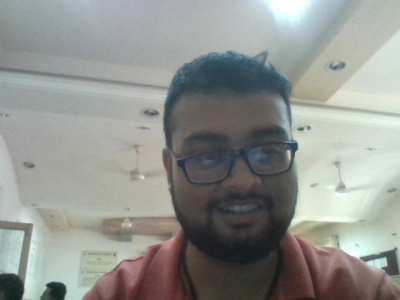

In [4]:
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

- faceProto = "/content/opencv_face_detector.pbtxt"
- faceModel = "/content/opencv_face_detector_uint8.pb"
- ageProto = "/content/age_deploy.prototxt"
- ageModel = "/content/age_net.caffemodel"
- genderProto = "/content/gender_deploy.prototxt"
- genderModel = "/content/gender_net.caffemodel"

In [7]:
!wget -N https://github.com/smahesh29/Gender-and-Age-Detection/blob/master/age_deploy.prototxt
!wget -N https://github.com/smahesh29/Gender-and-Age-Detection/blob/master/age_net.caffemodel

--2023-05-19 09:23:36--  https://github.com/smahesh29/Gender-and-Age-Detection/blob/master/age_deploy.prototxt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘age_deploy.prototxt’

age_deploy.prototxt     [ <=>                ] 185.96K  1009KB/s    in 0.2s    

Last-modified header missing -- time-stamps turned off.
2023-05-19 09:23:36 (1009 KB/s) - ‘age_deploy.prototxt’ saved [190423]

--2023-05-19 09:23:36--  https://github.com/smahesh29/Gender-and-Age-Detection/blob/master/age_net.caffemodel
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘age_net.caffemodel’

age_net.caffemodel      [ <=>                ] 138.14K   760KB/s    in 0.2s    

Last-modified header mis

In [13]:
age_weights = "/content/age_deploy.prototxt"
age_config = "/content/age_net.caffemodel"


In [14]:
ageNet = cv2.dnn.readNet(age_config, age_weights)

error: ignored

In [12]:
print(age_weights)

age_deploy.prototxt
